In [67]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

So all feature are object where as Target is float64 which make it a Regression problem

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

 Here we can see difference between columns values which means nan value are present

In [6]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

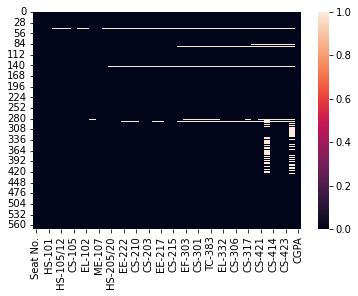

In [8]:
# Let's visualize NaN values
sns.heatmap(df.isnull())
plt.show()

most of the column has null value lets treat them

In [9]:
#we will use mode here as feature contain grade system 
for column in df:
    df[column]=df[column].fillna(df[column].mode()[0])
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [10]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [11]:
#Lets see the value counts of all the columns
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('*'*100)

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64



****************************************************************************************************
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64



****************************************************************************************************
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64



****************************************************************************************************
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64



****************************************

# visualisation

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

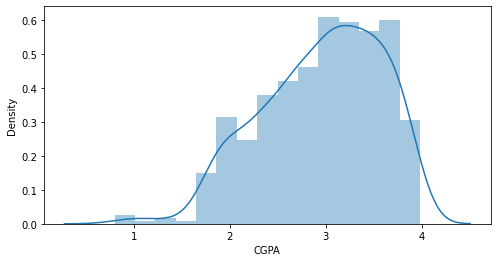

In [13]:
plt.figure(figsize=(8,4))
sns.distplot(df['CGPA'])


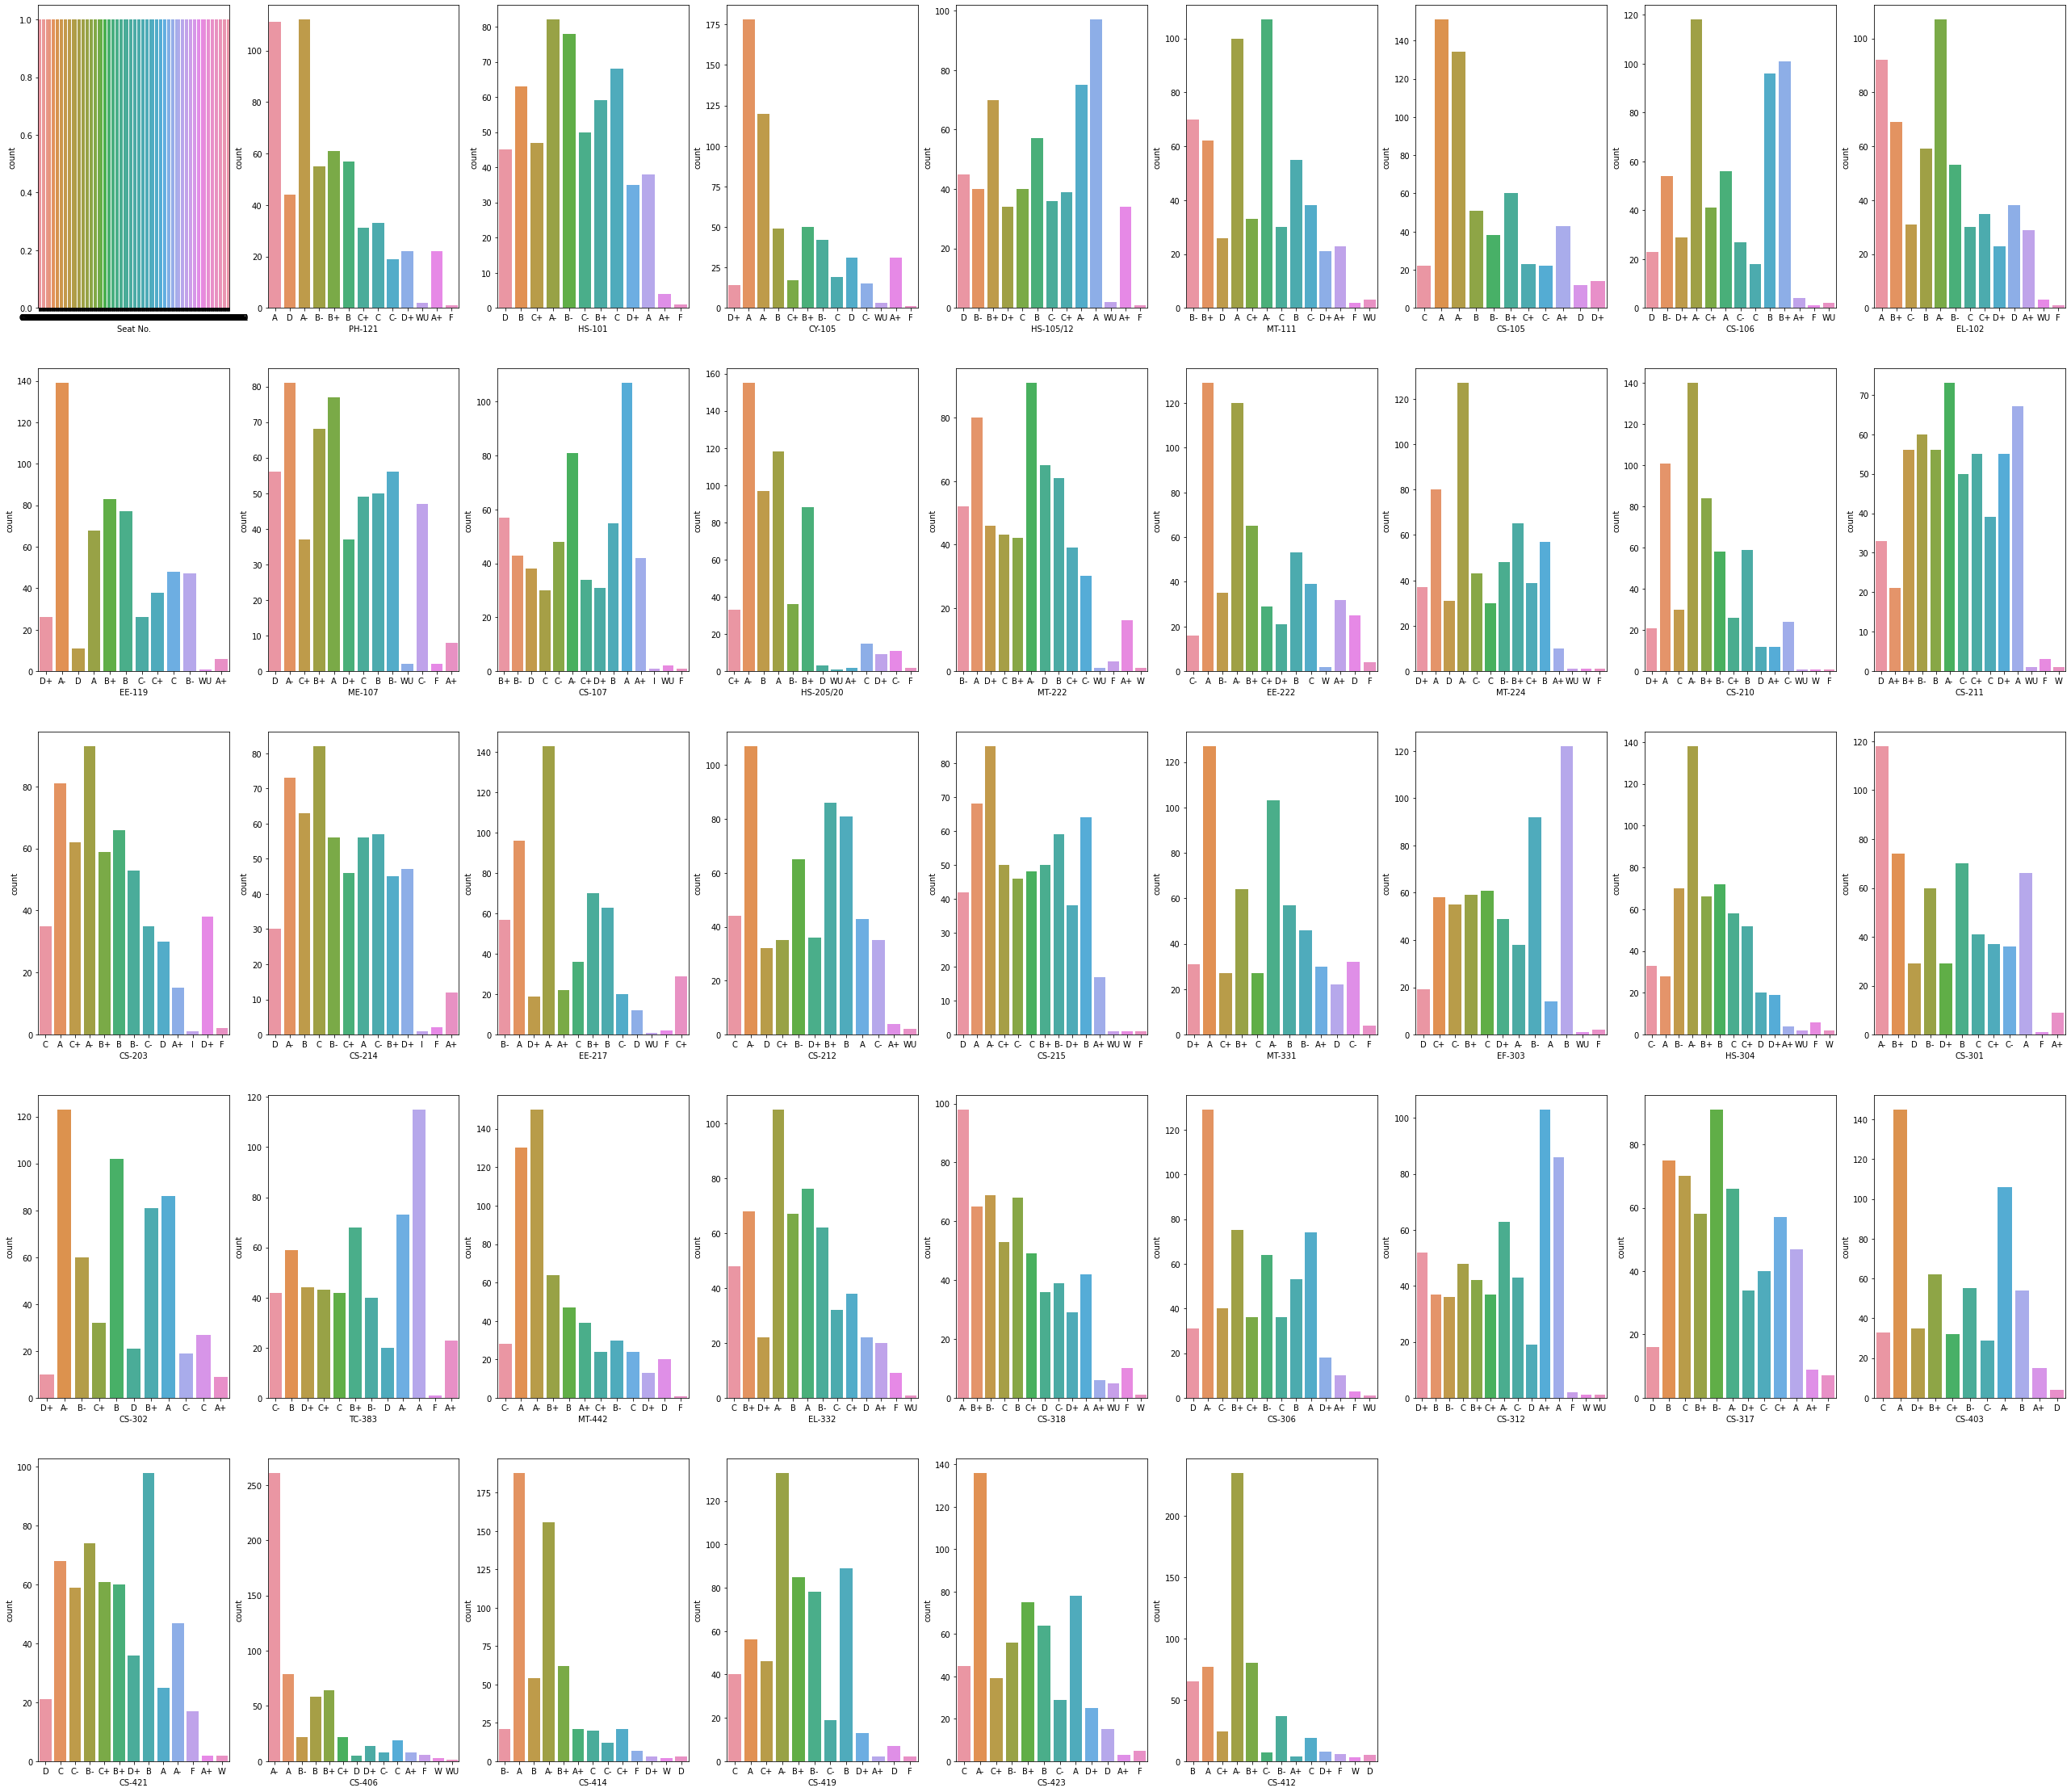

In [19]:
plt.figure(figsize=(45,40),facecolor='white')
plotnumber=1

for column in df[1:]:
    if plotnumber<=42:
        ax=plt.subplot(5,9,plotnumber)
        sns.countplot(x=column,data=df[1:])
    plotnumber=plotnumber+1

plt.show()

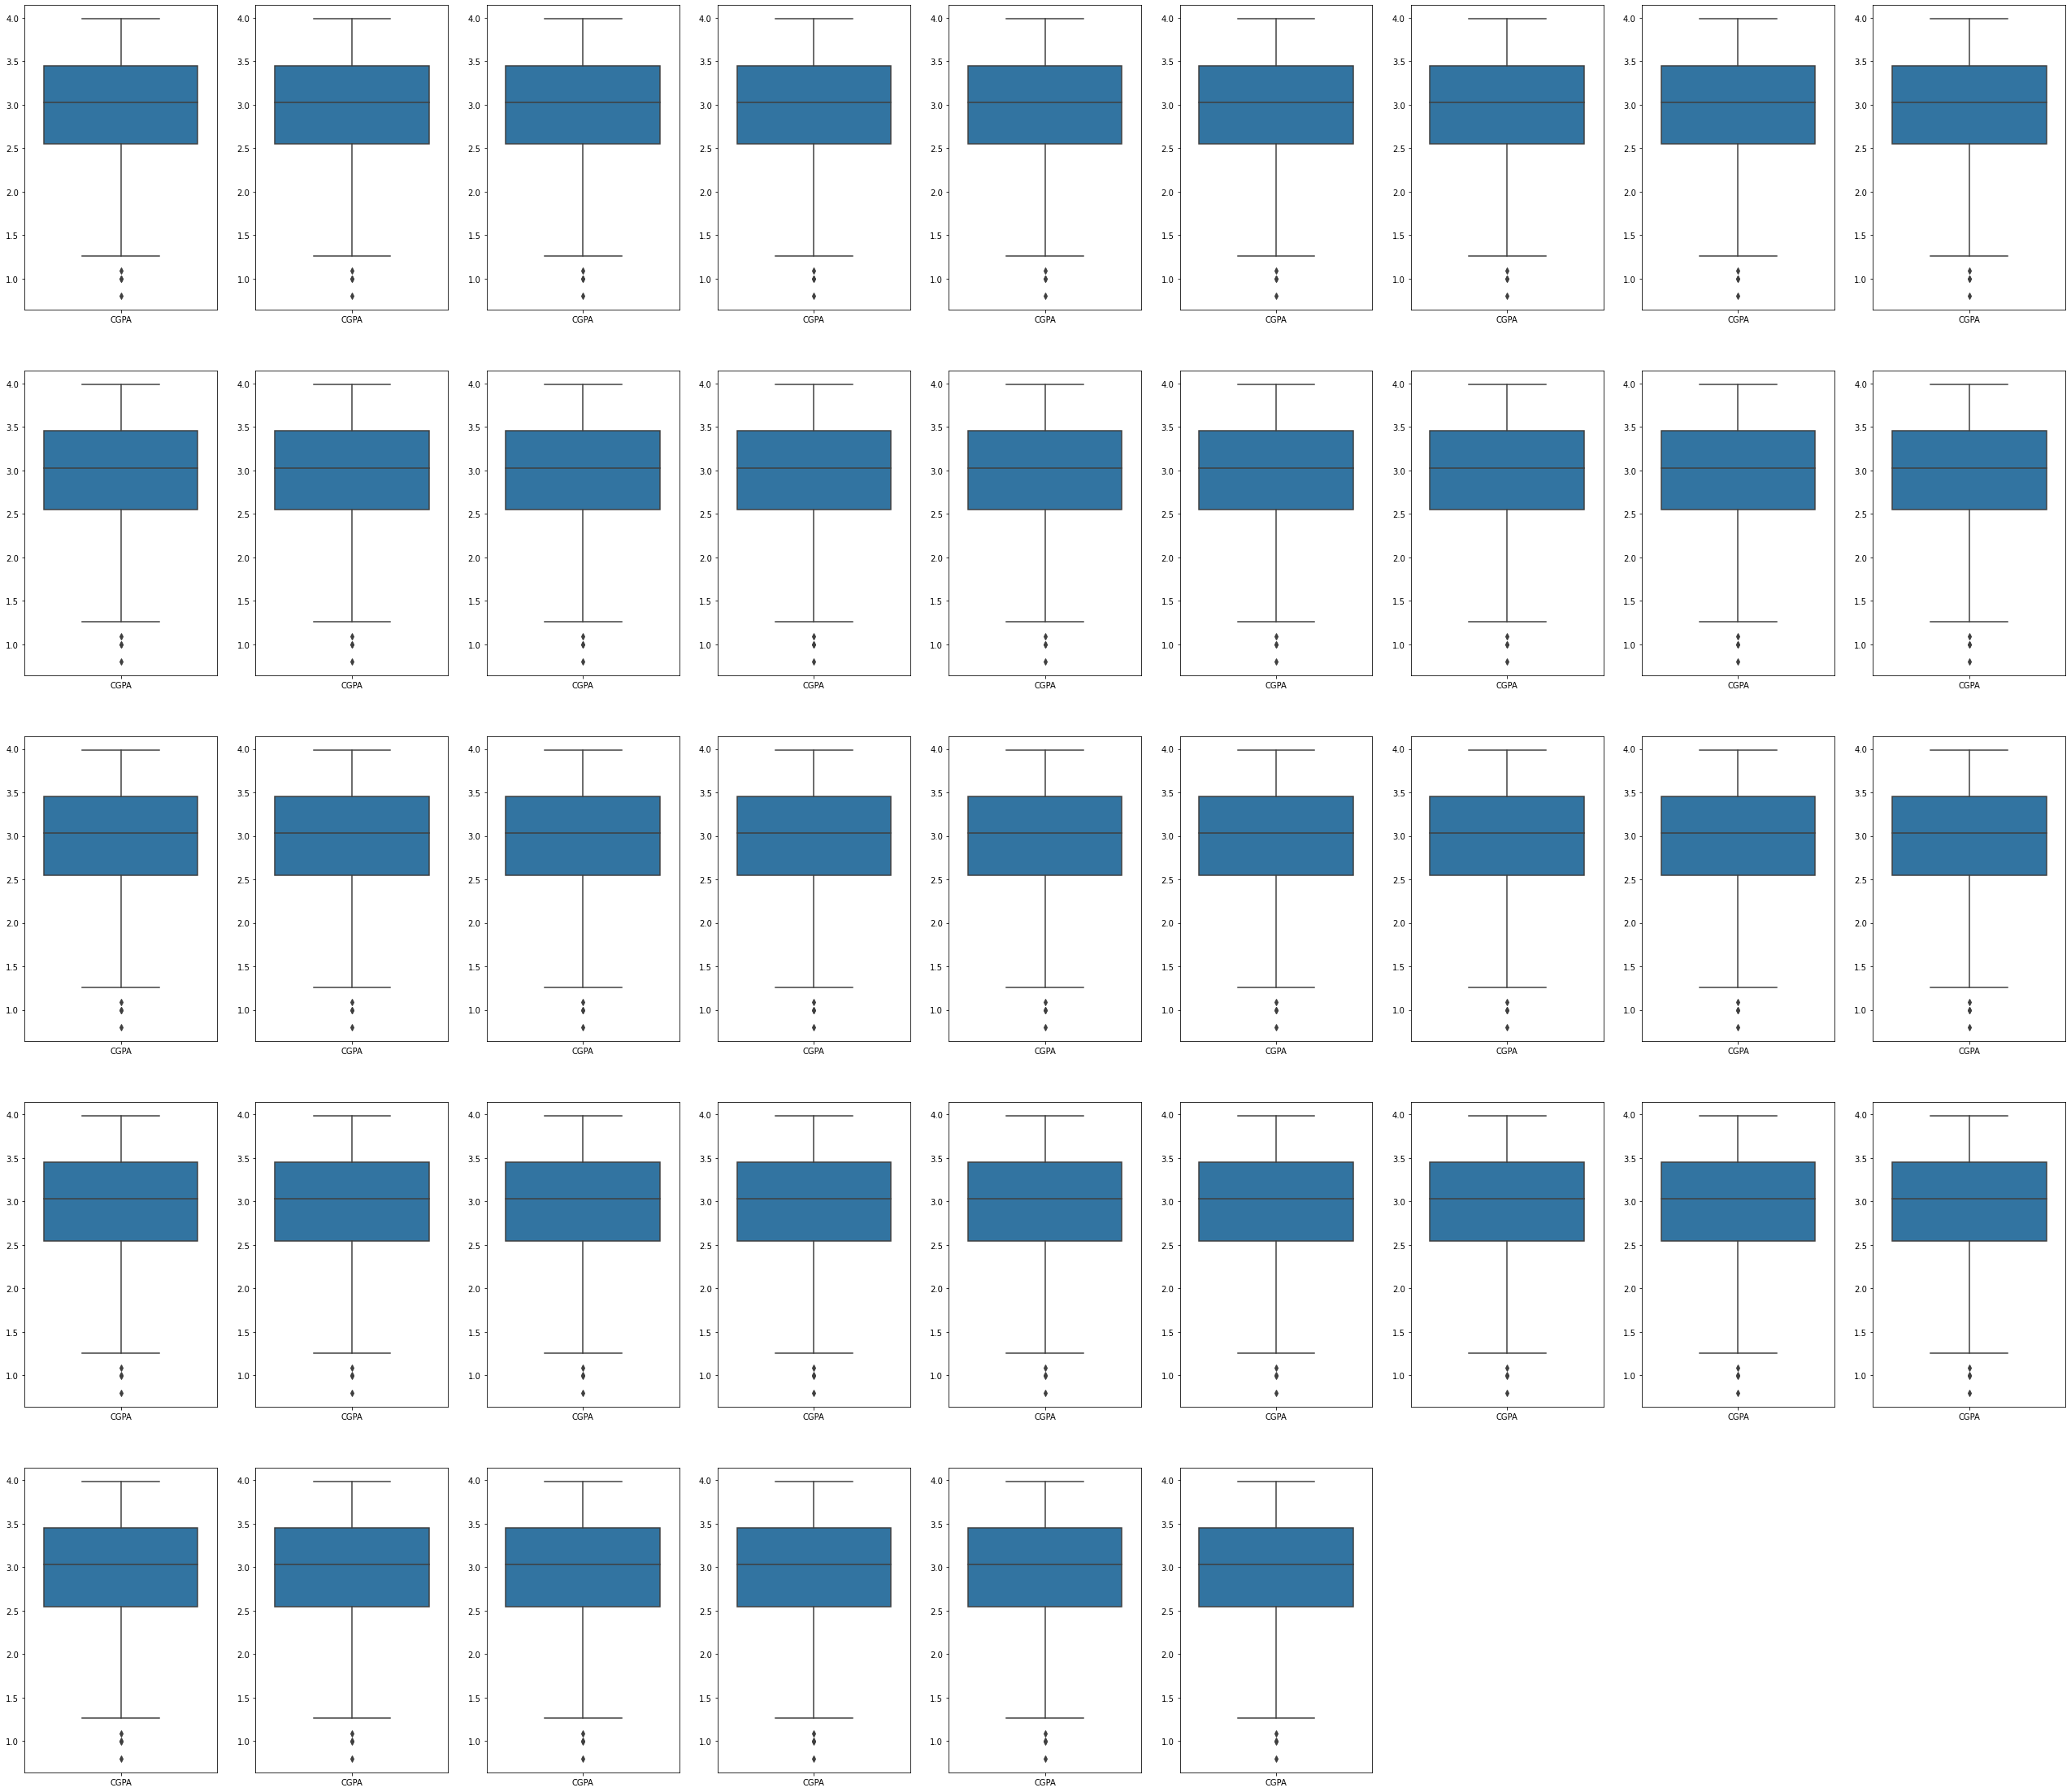

In [21]:
plt.figure(figsize=(45,40),facecolor='white')
plotnumber=1

for column in df[1:]:
    if plotnumber<=42:
        ax=plt.subplot(5,9,plotnumber)
        sns.boxplot(data=df[1:])
    plotnumber=plotnumber+1

plt.show()

we have outlier in our dataset but our feature contain categorical data we will not remive it

Since dataset has a lot of string values we will use encoding technique to convert string to numerical one for further analysis

In [25]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()

In [26]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


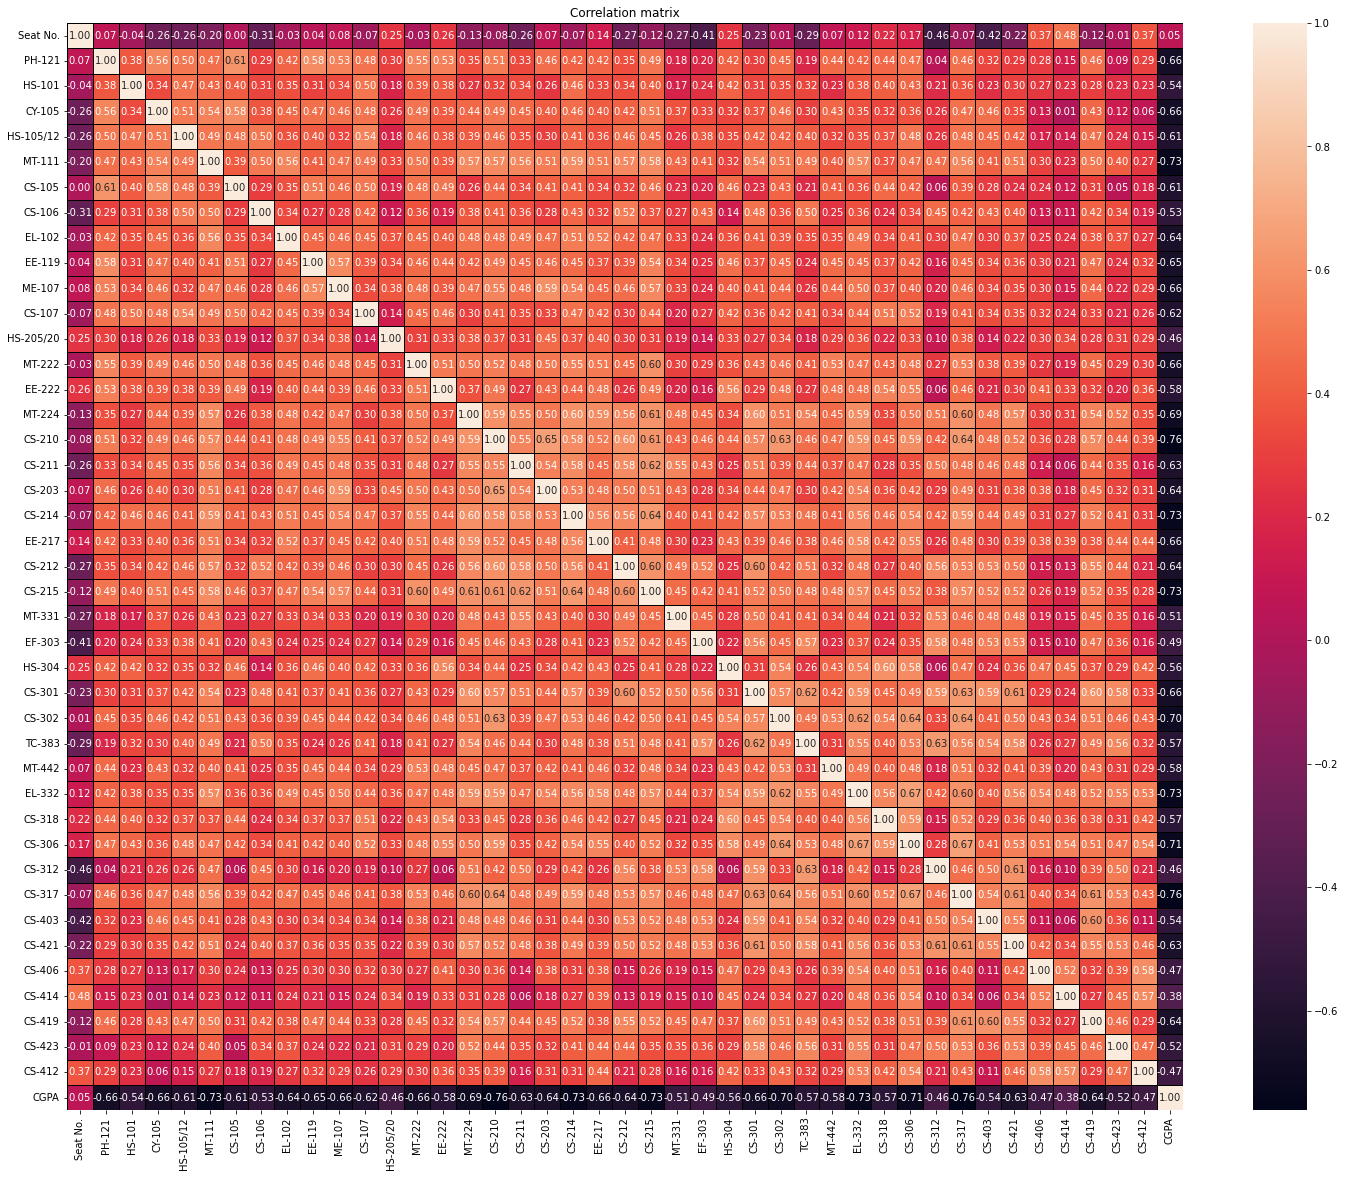

In [34]:
# Plotting heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.show()

We can see the multicollinearity is not present but we can confirm this with vif score

# Pre-Processing

In [36]:
df=df.drop(columns=['Seat No.'],axis=1)#as seat does not affect our target variable we will remove it

In [41]:
x=df.drop(columns=['CGPA'],axis=1)
y=df['CGPA']

In [42]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.40040198,  1.77089951,  1.72226058, ...,  1.74051347,
        -0.34612103, -0.45017773],
       [-1.24205154,  1.4115592 ,  2.39744822, ...,  0.90041779,
         0.72798282, -0.02104337],
       [-1.24205154, -0.74448263, -0.97848996, ..., -1.61986925,
        -0.70415565, -1.30844646],
       ...,
       [-0.25657943, -1.82250355, -0.30330233, ...,  0.06032211,
        -0.70415565, -0.45017773],
       [-1.24205154, -0.38514232,  2.0598544 , ..., -0.35972573,
         0.3699482 ,  1.26635973],
       [ 0.72889268,  1.4115592 ,  2.0598544 , ...,  0.06032211,
         1.80208667,  2.12462846]])

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
def vif_col():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print(vif)

In [56]:
vif

,vif1
0,2.827608
1,1.771294
2,2.514966
3,2.293035
4,2.638921
5,2.366597
6,1.927701
7,1.968027
8,2.190768
9,2.294552


Variance Inflation Factor is less than 5 for all columns so there is no multicollinearity

# MODEL BUILDING

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [64]:
#LET FIRST FIND THE BEST RANDOM STATE TO GET BEST ACCUARACY
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.9639210648520139 at random_state 36


In [65]:
# Split the dataset into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=36)

# Linear regression

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)

#R2 Score for training data
y_pred_train = lr.predict(X_train)
r2_score_train_linear = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = lr.predict(X_test)
r2_score_test_linear = r2_score(y_test, y_pred_test)
print('R2_score (Train Accuracy) : ',(r2_score_train_linear))
print('R2_score (Test Accuracy) : ',(r2_score_test_linear))

R2_score (Train Accuracy) :  0.9249294474617054
R2_score (Test Accuracy) :  0.9506194726004772


# RANDOM FOREST REGRESSOR

In [76]:
random_model = RandomForestRegressor()

random_model.fit(X_train,y_train)
#R2 Score for training data
y_pred_train = random_model.predict(X_train)
r2_score_train_random = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = random_model.predict(X_test)
r2_score_test_random = r2_score(y_test, y_pred_test)
print('R2_score (Train Accuracy) : ',(r2_score_train_random))
print('R2_score (Test Accuracy) : ',(r2_score_test_random))

R2_score (Train Accuracy) :  0.9873280151684402
R2_score (Test Accuracy) :  0.9647491198144418


# DECISION TREE REGRESSION

In [77]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
#R2 Score for training data
y_pred_train = DT.predict(X_train)
r2_score_train_dt = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = DT.predict(X_test)
r2_score_test_dt = r2_score(y_test, y_pred_test)
print('R2_score (Train Accuracy) : ',(r2_score_train_dt))
print('R2_score (Test Accuracy) : ',(r2_score_test_dt))

R2_score (Train Accuracy) :  1.0
R2_score (Test Accuracy) :  0.8625951226370665


# GradientBoostingRegressor

In [78]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

#R2 Score for training data
y_pred_train = gb.predict(X_train)
r2_score_train_gb = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = gb.predict(X_test)
r2_score_test_gb = r2_score(y_test, y_pred_test)

print('R2_score (Train Accuracy) : ',(r2_score_train_gb))
print('R2_score (Test Accuracy) : ',(r2_score_test_gb))

R2_score (Train Accuracy) :  0.9956220837550764
R2_score (Test Accuracy) :  0.9686172250295586


It seems the Gradient Boosting Regression model is the best choice for my dataset. we are happy with the training and testing accuracy. so our best model is GradientBoostingRegressor

# saving the model

In [89]:
import pickle
filename = 'Grades.pkl'
pickle.dump(new_gb,open(filename,'wb'))#saved model

In [90]:
loaded_model=pickle.load(open('Grades.pkl','rb'))